<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h2><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h2>
<h2><center> Neural Networks & Deep Learning Project: Bank Churn Prediction </center></h2>
<h3><center> <i>By Vaibhav Pradhan</i> </center></h3>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
!pip install tensorflow==2.9
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 115.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 70.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: t

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [3]:
url = "/content/drive/MyDrive/PGP-AIML/Project5/data/Churn.csv"
ds = pd.read_csv(url)

## Data Overview

- Observations

### Checking the shape of the dataset

In [4]:
# checking shape of the data
print(f"There are {ds.shape[0]} rows and {ds.shape[1]} columns.")

There are 10000 rows and 14 columns.


### Displaying few rows of the dataset

In [5]:
# viewing the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking the data types of the columns for the dataset

In [6]:
# checking datatypes and number of non-null values for each column
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


** Columns in the dataset are numeric as well as categorical values**

### Checking the missing values

In [7]:
# checking for missing values
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**There are no missing values**

In [8]:
# checking the number of unique values in each column
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**There are no missing values detected so no imputation is needed**

### Statistical summary of the dataset

In [9]:
# Let's look at the statistical summary of the data
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- RowNumber and Customerid are identifiers for the records hence are not useful for analysis
- Numerical columns have different range of values hence the data will need to be scaled
- Columns/Features with category/yes/no values will need to be encoded

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

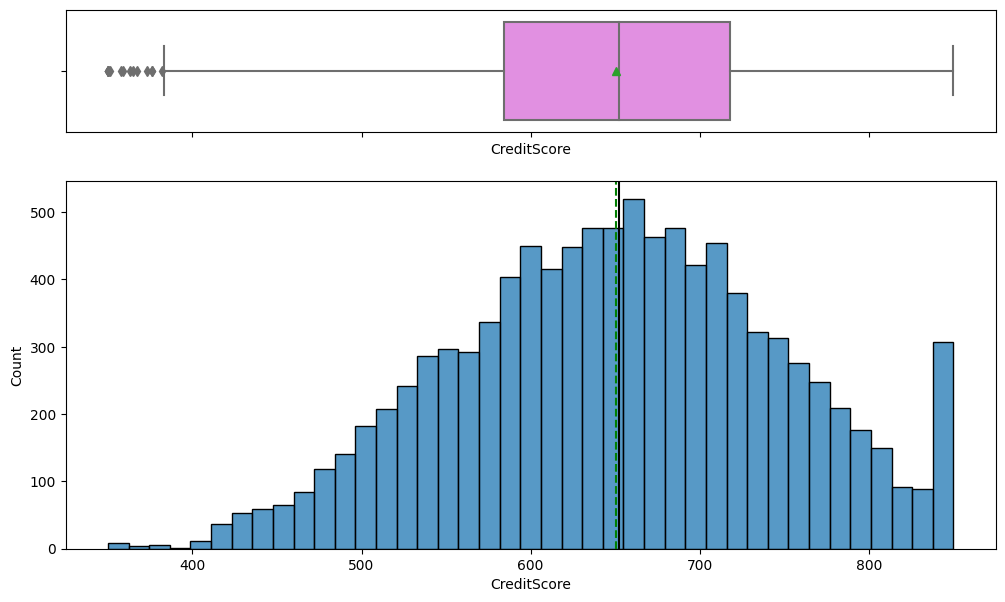

In [12]:
histogram_boxplot(ds,'CreditScore')

- CreditScore distribution seems more or less normal distribution
- There are a few outliers but not very significant

#### Observations on Age

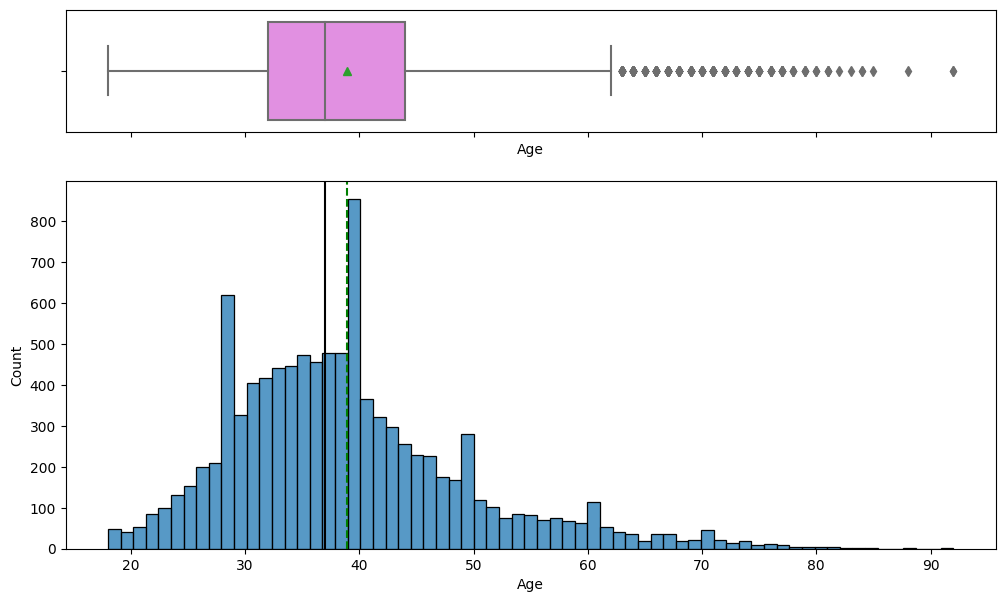

In [13]:
histogram_boxplot(ds,'Age')          ## Create histogram_boxplot for CreditScore

- Dsitribution is slightly right skewed
- Several outliers on the right side whihc indicates older folks/seniors

#### Observations on Balance

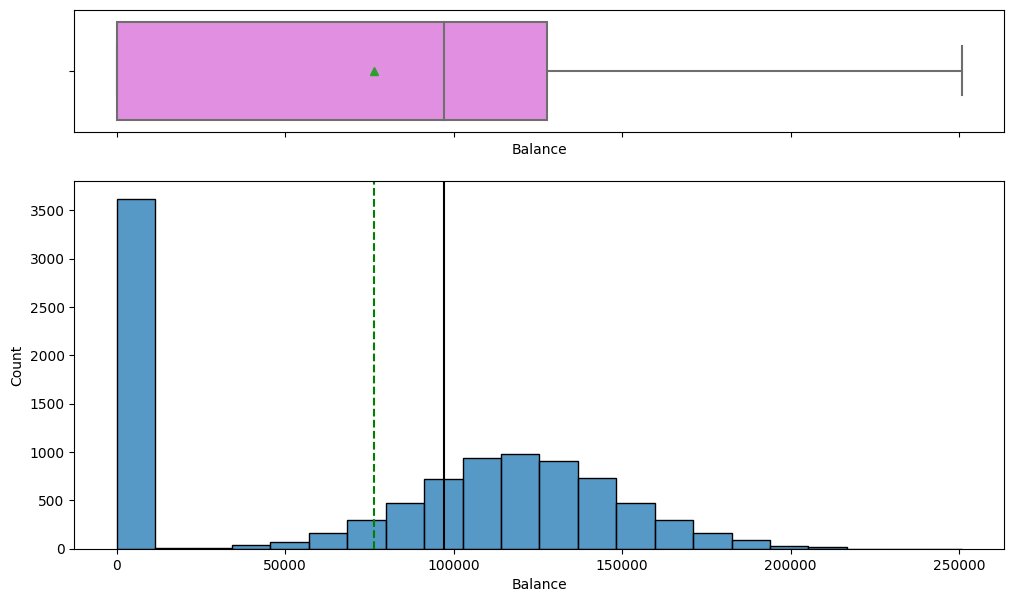

In [14]:
histogram_boxplot(ds,'Balance')          ## Create histogram_boxplot for Balance

- Balance is significantly left skewed because of several customers with 0 balance
- The remaining customers are more or less normally distributed
- There are no outliers

#### Observations on Estimated Salary

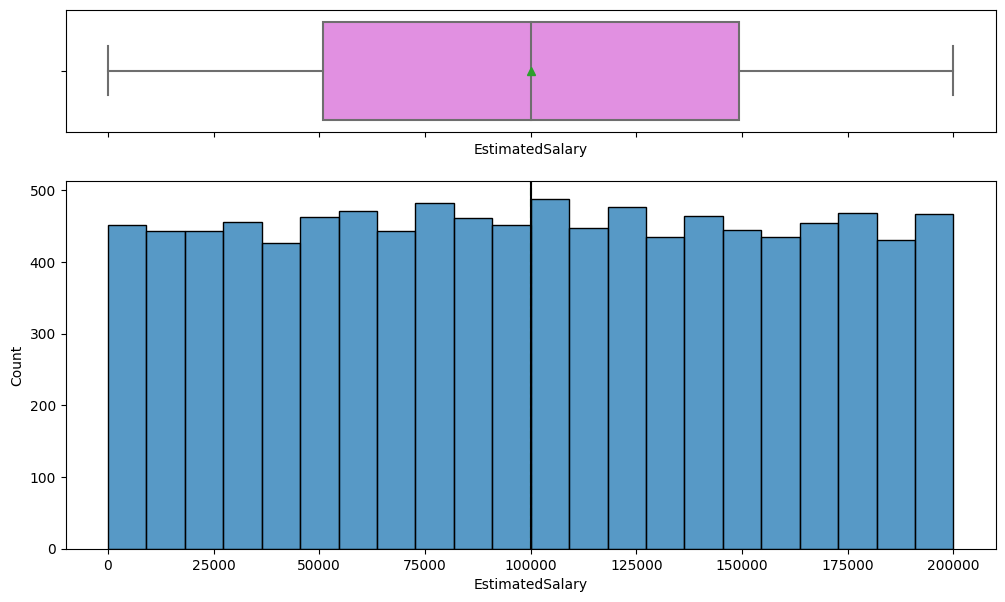

In [15]:
histogram_boxplot(ds,'EstimatedSalary')          ## Ccreate histogram_boxplot for Estimated Salary

- Estimated salary is more or less normally distributed with no outliers

#### Observations on Exited

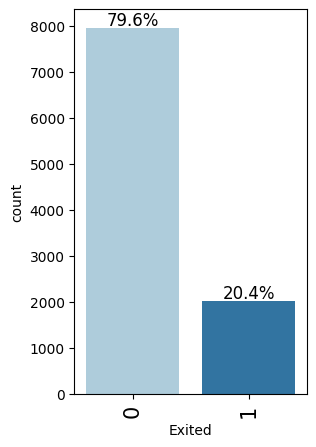

In [16]:
labeled_barplot(ds, "Exited", perc=True)

- ~80% of customers are not churning i.e. they stay with the bank
- ~20% customers are churning  / there is attrition
- Data is imbalanced so modeling would need to factor that

#### Observations on Geography

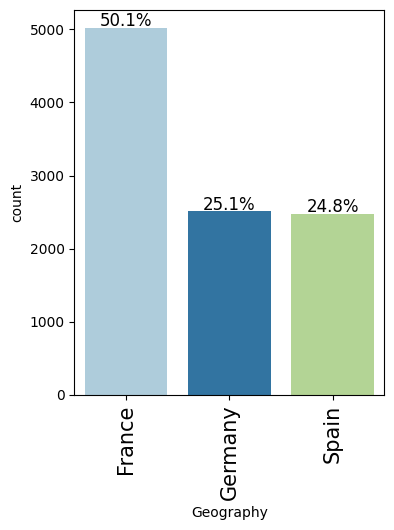

In [17]:
labeled_barplot(ds,'Geography',perc=True)               ## Create labeled_barplot for Geography

- France has ~50% of the data records
- Germany and Spain cover the remaining data records in a more or less equal manner

#### Observations on Gender

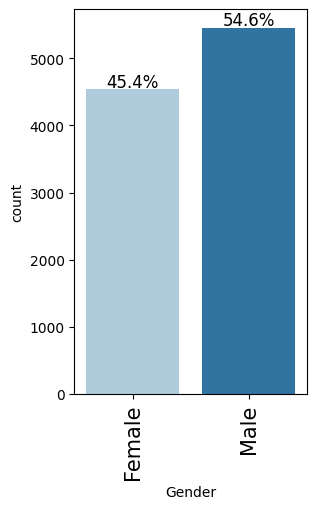

In [18]:
labeled_barplot(ds,'Gender',perc=True)               ## Create labeled_barplot for Gender

- There are slightly more Male customers as compared to Female customers

#### Observations on Tenure

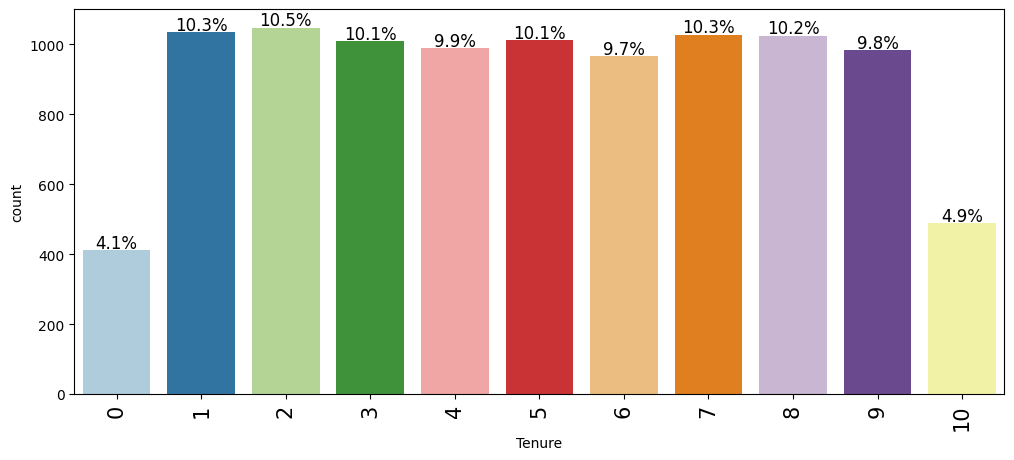

In [19]:
labeled_barplot(ds,'Tenure',perc=True)               ## Create labeled_barplot for Tenure

- Customer tenure varies from 0 to 10 years
- Except for customers with tenure of 0 and 10 years, customers are more or less equally distributed across tenure years 1 thorugh 9

#### Observations on Number of Products

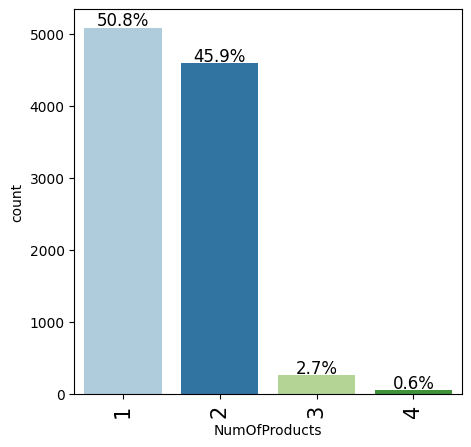

In [20]:
labeled_barplot(ds,'NumOfProducts',perc=True)               ## Create labeled_barplot for Number of products

- Most customers have 1 or 2 products
- about ~3% customers have 3 products and less than 1% of customers have 4 products

#### Observations on Has Credit Card

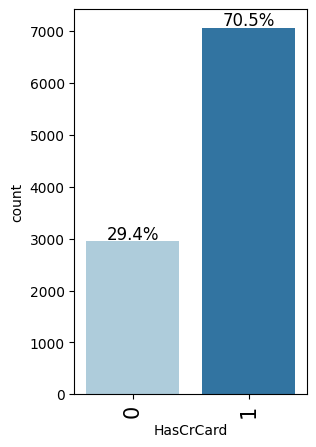

In [21]:
labeled_barplot(ds,'HasCrCard',perc=True)               ## Complete the code to create labeled_barplot for Has credit card

- ~71% customers haave credit cards

#### Observations on Is Active Member

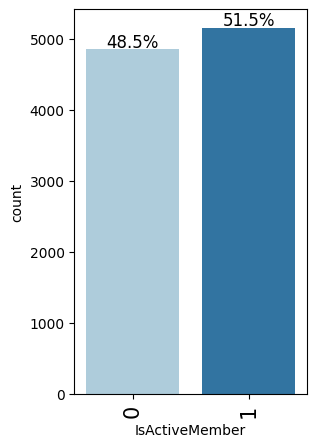

In [22]:
labeled_barplot(ds,'IsActiveMember',perc=True)               ## Complete the code to create labeled_barplot for Is active member

- ~52% customers are actively using the bank products
- A significantly high number ~48% customers are not active and these should be further analysed to see if are the ones who eventually exit the bank

### Bivariate Analysis

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

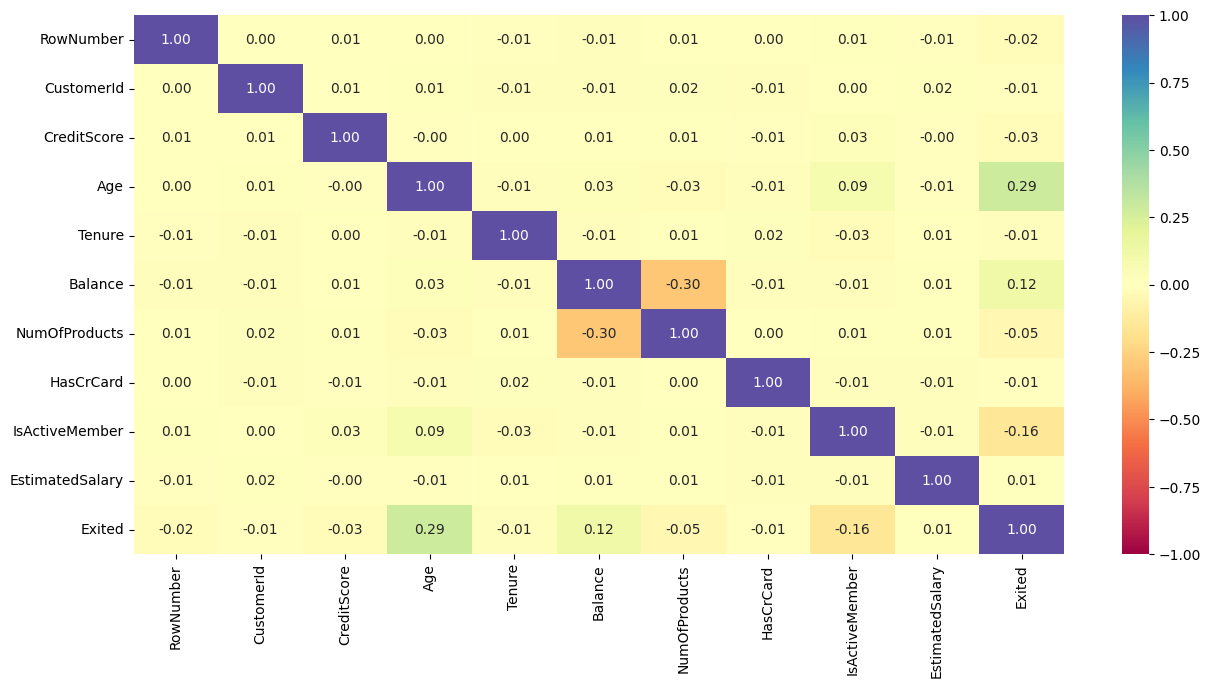

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

- There is no strong correlationship between the variables/features

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


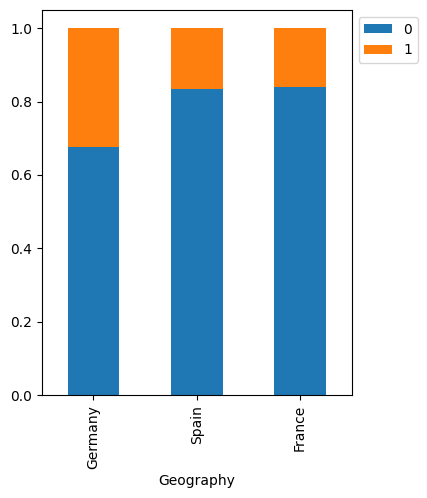

In [25]:
stacked_barplot(ds, "Geography", "Exited" )

- Germany has a significantly higher number of customer attrition

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


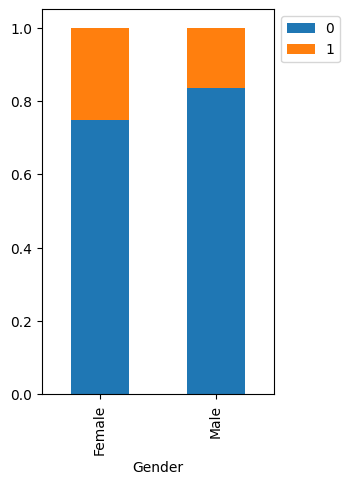

In [26]:
stacked_barplot(ds, "Gender", "Exited")                   ## Plot stacked barplot for Exited and Number of follow ups

- More Females are churning compared to Males

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


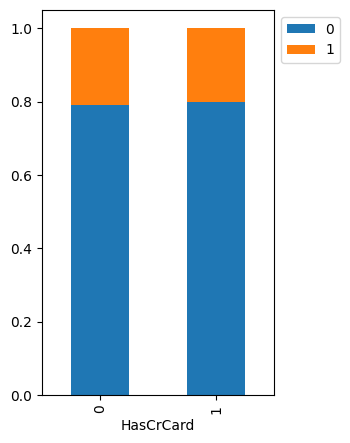

In [27]:
stacked_barplot(ds, "HasCrCard", "Exited")                   ## Plot stacked barplot for Exited and Has credit card

- No significant difference between the two categories

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


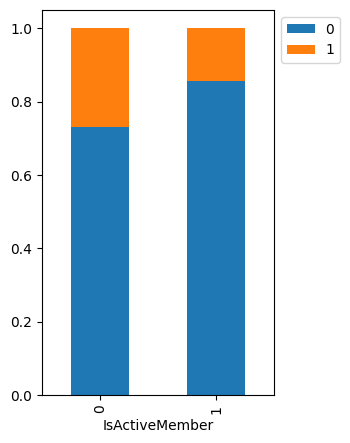

In [28]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   ## Plot stacked barplot for Exited and Is active member

- Higher number of customers churning are InActive customers

#### Exited Vs Credit Score

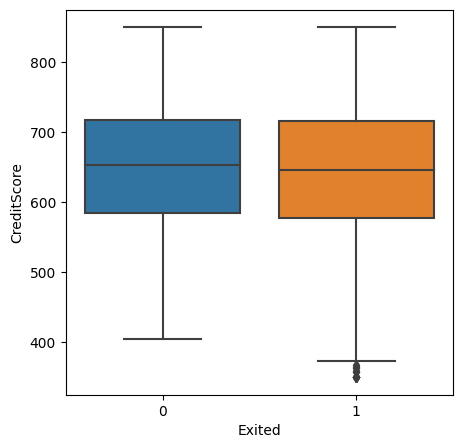

In [29]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

- No significant differences to highlight here

#### Exited Vs Age

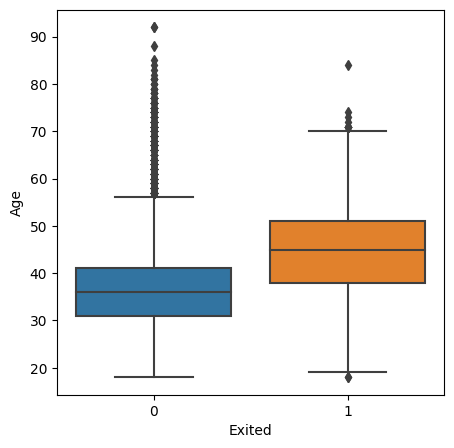

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## Plot the boxplot for Exited and Age
plt.show()

- A number of older customers are churning compared to the younger ones

#### Exited Vs Tenure

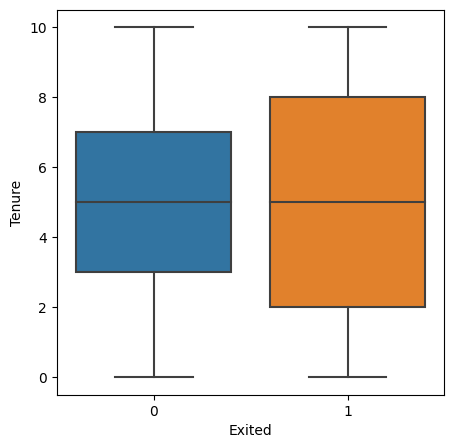

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Plot the boxplot for Exited and Tenure
plt.show()

- MOre customers are churning with a broader range of tenure

#### Exited Vs Balance

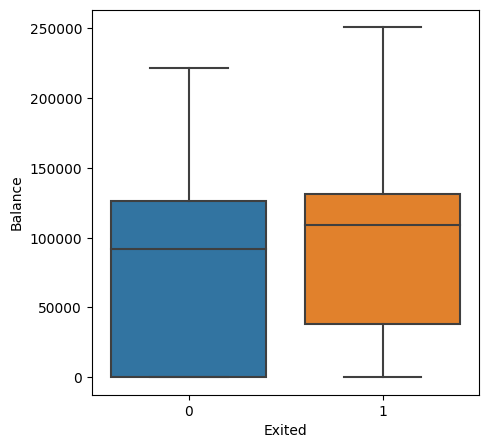

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Plot the boxplot for Exited and Balance
plt.show()

- Customers churning have more higher incomes compared to the ones staying with the bank

#### Exited Vs Number of Products

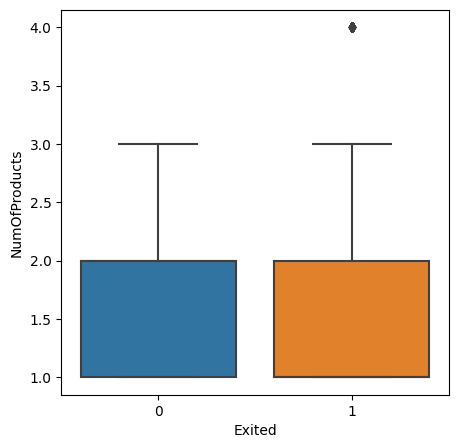

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Plot the boxplot for Exited and Number of products
plt.show()

- no significant difference. customers with 4 products are churning

#### Exited Vs Estimated Salary

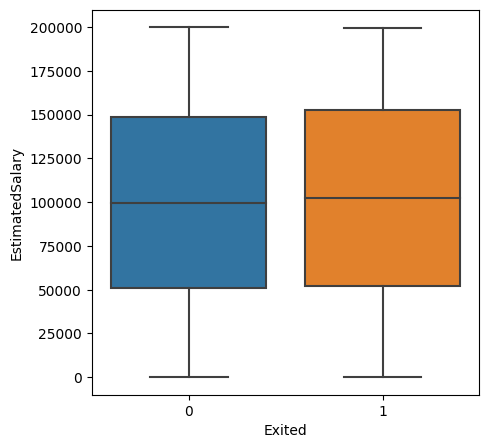

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Plot the boxplot for Exited and Salary
plt.show()

No significant difference

### EDA Observation Questions & Responses

- What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
>>>  Credit Score are more or less evenly distributed. There are few outliers but not very significant

- How many active members are there with the bank?
>>> 5150 of 10000 customers are active members which equates to 51.5%

- How are the different customer attributes correlated to each other?
>>> Various customer attributes show minimal to insignificant correlation.

- Who is churning more when compared to males and females?
>>> More number of Female customers are churning

- Customers from which geographical part are churning more?
>>> Germany has a significant number of customers churning

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Per data analysis above, there are no missing values so no imputation is needed**

### Drop Columns that add no values and are unique across the data records

In [35]:
# RowNumber , CustomerId and Surname are unique hence drop them
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)  # Drop the columns with most unique values

### Outlier Detection

In [36]:
threshold = 2.5 # Lets use the value of the threshold as 2.5
outlier = {}
numeric_columns = ds.select_dtypes(include=['number'])
for col in numeric_columns:
    i = numeric_columns[col]
    mean = np.mean(numeric_columns[col])
    std = np.std(numeric_columns[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 CreditScore : []

 Age : [66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 

### Preparing data for Modeling

In [37]:
X = ds.drop(['Exited'],axis=1)    ## Obtain the independent features into variable X
y = ds[['Exited']]                ## Obtain the dependent features into variable y

In [38]:
# Splitting the dataset into the Training/Validation and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Split the X and y and obtain test set

In [39]:
# Splitting the dataset further into the Training and Validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ##  Split X_large and y_large to obtain train and validation sets

**Create dummy variables for string type variables**

In [40]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True) ## Encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     ## Encode Geography and Gender in validation set

**Normalize the numerical data**

In [41]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Function to plot Confusion Matrix**

In [42]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [43]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [44]:
# Initializing the ANN
classifier = Sequential()
# Add the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

# Add the 1st hidden layer with 32 neurons
classifier.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [45]:
## Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
## Obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [47]:
## Fit the model on train data for 100 epochs
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 4s 5ms/step - loss: 0.5052 - accuracy: 0.7894 - val_loss: 0.4681 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4607 - accuracy: 0.7970 - val_loss: 0.4533 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4471 - accuracy: 0.7998 - val_loss: 0.4450 - val_accuracy: 0.7956
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.8042 - val_loss: 0.4397 - val_accuracy: 0.8081
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.8091 - val_loss: 0.4355 - val_accuracy: 0.8087
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8133 - val_loss: 0.4325 - val_accuracy: 0.8138
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4247 - accuracy: 0.8167 - val_loss: 0.4302 - val_accuracy: 0.8163

**Loss Function**

63/63 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8570


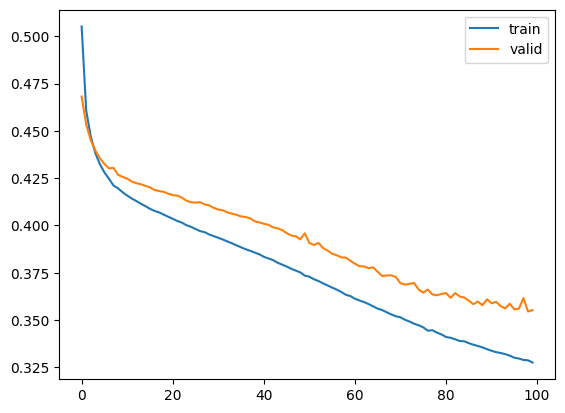

In [48]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

Based on the chart above
- Both the training and validation losses are decreasing as # of epochs increase
- However, the validation graph is diverging from training after a point and has significant gap which indicates that this model is a overfitting

**Confusion Matrix**

50/50 [==============================] - 0s 2ms/step


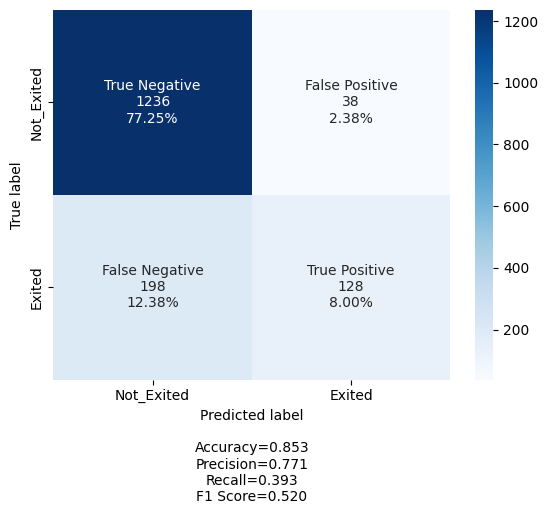

In [49]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

- The above model has relatively decent Accuracy and Precision but has a very poor Recall.
- This wont be an acceptable model for the bank
- The model can be further tuned by tuning hyperparameters, using different activation methods, and also removing the imbalance in the data

### Model Building: Neural Network model with Adam Optimizer

In [50]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [51]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ## Add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ## Add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ## Add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## Initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

      ## Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [52]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [53]:
## Complete the code to fit the model on train data
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.8052 - val_loss: 0.4346 - val_accuracy: 0.8094
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8238 - val_loss: 0.4208 - val_accuracy: 0.8169
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8286 - val_loss: 0.4144 - val_accuracy: 0.8275
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8323 - val_loss: 0.4151 - val_accuracy: 0.8181
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3852 - accuracy: 0.8370 - val_loss: 0.4026 - val_accuracy: 0.8331
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3772 - accuracy: 0.8431 - val_loss: 0.3932 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3703 - accuracy: 0.8445 - val_loss: 0.3815 - val_accuracy: 0.8431

**Loss function**

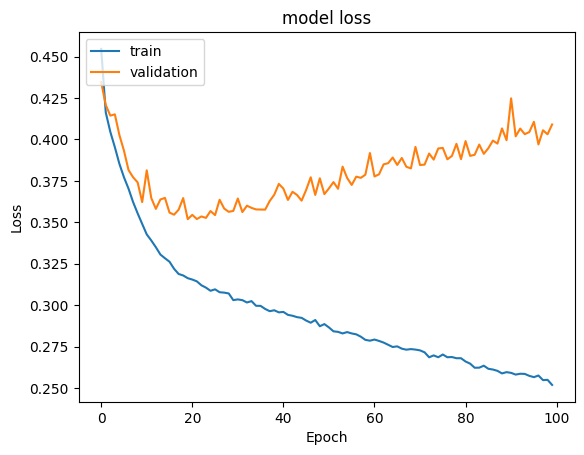

In [54]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above image, this model is severely overfitting. Deep learning models are very sensitive to overfitting due to a large number of parameters. We need to find the optimal point where the training should be stopped.

The best solution for the above problem is **Early stopping**.

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [62]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
model_e=create_model()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4464 - accuracy: 0.8036 - val_loss: 0.4317 - val_accuracy: 0.8125
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8261 - val_loss: 0.4186 - val_accuracy: 0.8194
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8344 - val_loss: 0.4138 - val_accuracy: 0.8325
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3940 - accuracy: 0.8364 - val_loss: 0.4100 - val_accuracy: 0.8356
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3854 - accuracy: 0.8386 - val_loss: 0.4044 - val_accuracy: 0.8306
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8456 - val_loss: 0.3905 - val_accuracy: 0.8469
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8464 - val_loss: 0.3807 - val_accuracy: 0.8419

**Loss function**

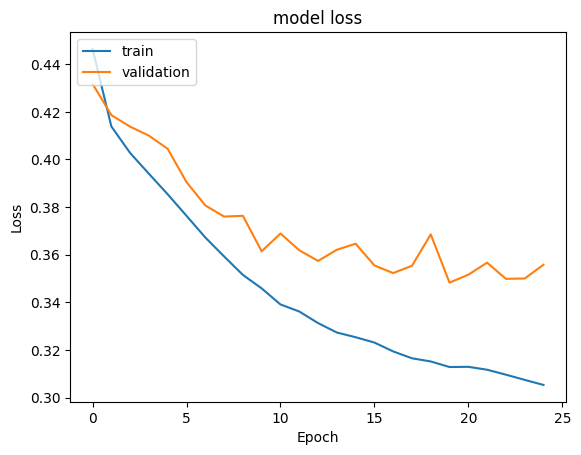

In [63]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.182834, G-Mean=0.812


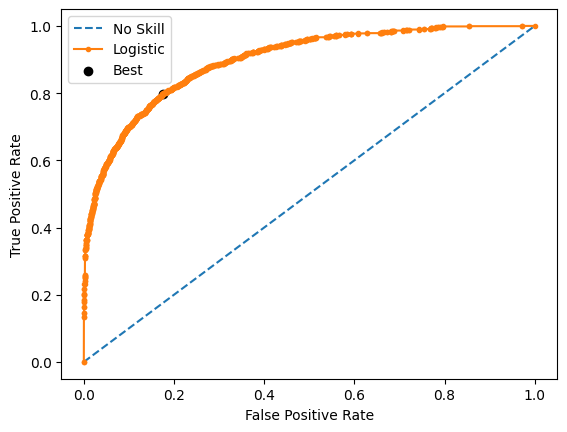

In [64]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [65]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [66]:
## Obtain the classification report using y_val
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.51      0.73      0.60       326

    accuracy                           0.80      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.84      0.80      0.81      1600



**Confusion matrix**

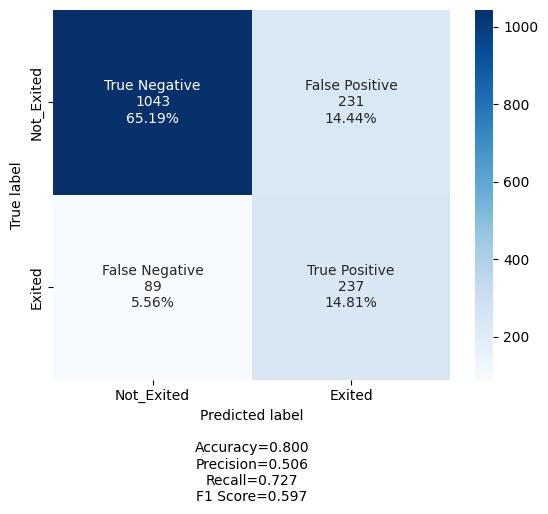

In [67]:
## Complete the code with y_val and y_pred_e to plot the confusion matrix

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

- As you can see, just using a different activation function like Adam, the model still was overfitting hence EarlyStopping had to be used
- Additionally, the threshold can be tuned further using ROCAOC curve
- After tuning the threshold and using EarlyStopping the model performance is better than the previous model
- The Accuracy has improved but more importantly the Recall is now at 72.7% which is much better
- The data imbalance still needs to be addressed
- The overfitting problem can still further be addressed by using reduced number of neurons and adding a dropout layer

### Model Improvement: Neural Network model with Dropout

In [68]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [69]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Add dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [70]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [71]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [72]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4900 - accuracy: 0.7983 - val_loss: 0.4415 - val_accuracy: 0.8012
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.8045 - val_loss: 0.4283 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.8127 - val_loss: 0.4229 - val_accuracy: 0.8188
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.8127 - val_loss: 0.4201 - val_accuracy: 0.8250
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4202 - accuracy: 0.8216 - val_loss: 0.4146 - val_accuracy: 0.8213
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.8183 - val_loss: 0.4112 - val_accuracy: 0.8250
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8220 - val_loss: 0.4079 - val_accuracy: 0.8300

**Loss function**

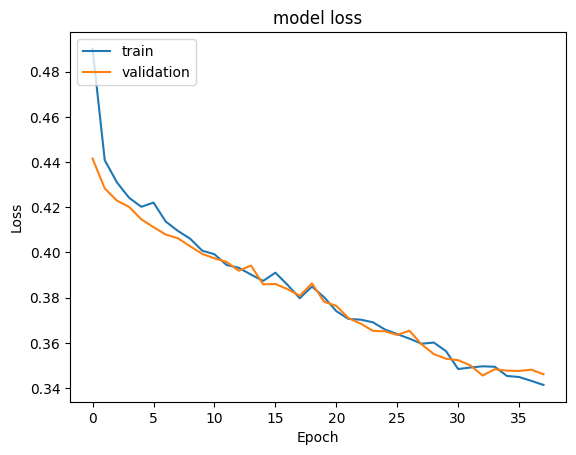

In [73]:
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.197977, G-Mean=0.794


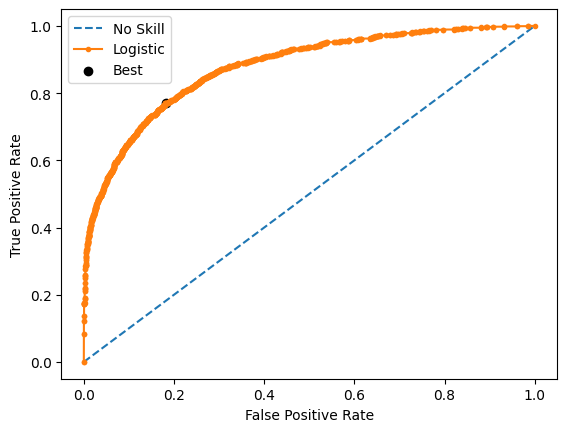

In [74]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [75]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [76]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1274
           1       0.51      0.74      0.60       326

    accuracy                           0.80      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.80      0.81      1600



**Confusion report**

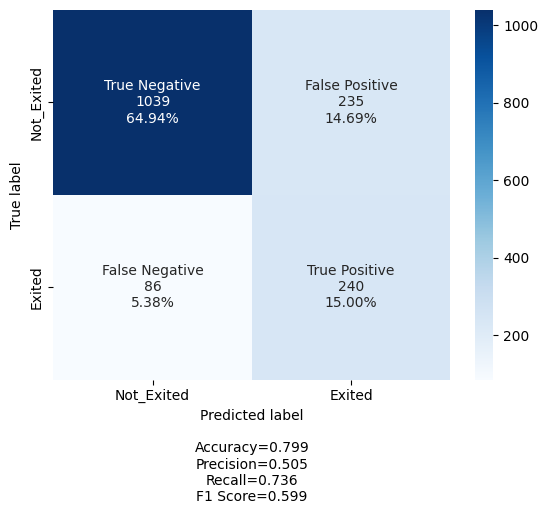

In [77]:
# Complete the code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

- As you can see from the loss chart the model is no longer overfitting
- The Accuracy has more or less remained same at 0.799 instead of 0.80 in model 2
- The Recall is also slighly improved so this model strikes a decent balance so far between Recall and Accuracy
- Lets explore if we can further improve this model by Hyperparameter tuning

### Model Improvement: Neural Network model with Hyperparameter tuning

In [78]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [79]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [80]:
## Complete the code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [81]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [82]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 6ms/step - loss: 0.4590 - accuracy: 0.8011 - val_loss: 0.4301 - val_accuracy: 0.8069
Best: 0.820156 using {'batch_size': 64, 'lr': 0.01}


**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [83]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [84]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7998 - val_loss: 0.4288 - val_accuracy: 0.8138
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4216 - accuracy: 0.8220 - val_loss: 0.4115 - val_accuracy: 0.8256
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8300 - val_loss: 0.4078 - val_accuracy: 0.8263
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8320 - val_loss: 0.4031 - val_accuracy: 0.8325
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8380 - val_loss: 0.3937 - val_accuracy: 0.8313
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8397 - val_loss: 0.3689 - val_accuracy: 0.8512
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3820 - accuracy: 0.8455 - val_loss: 0.3656 - val_accuracy: 0.8475

**Loss function**

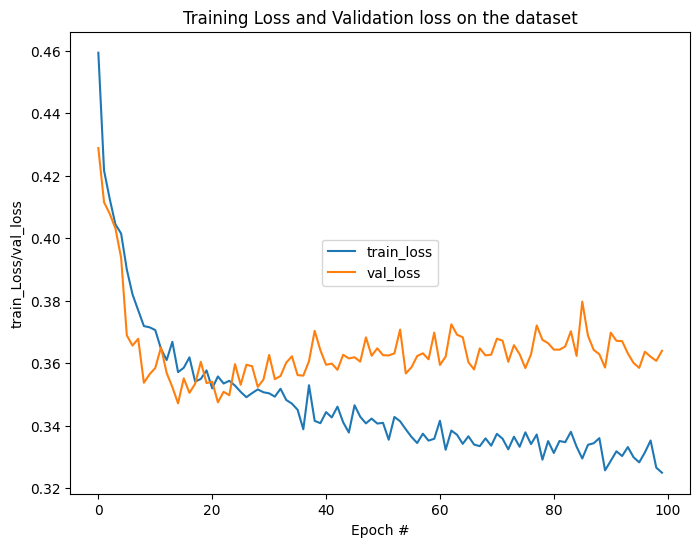

In [85]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

**Threshold**

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.256508, G-Mean=0.814


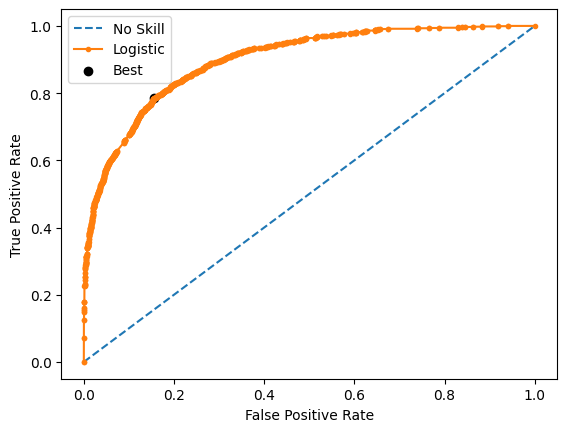

In [86]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [87]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[0.12195535]
 [0.00267475]
 [0.03740339]
 ...
 [0.11667889]
 [0.6489505 ]
 [0.46115887]]


In [88]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


**Classification report**

In [89]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1274
           1       0.52      0.70      0.60       326

    accuracy                           0.81      1600
   macro avg       0.72      0.77      0.73      1600
weighted avg       0.84      0.81      0.82      1600



**Confusion matrix**

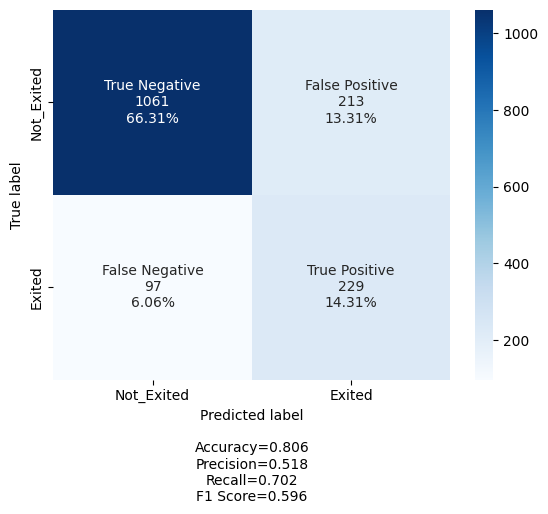

In [90]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

So with the hyperparamter tuning for the model above
- Accuracy has more or less remained the same  0.799 vs 0.806 now
- Recall has dropped in value slightly hence the prior model is still so far the best choice
- Lets try if balancing the data helps to improve further

### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [91]:
## Apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

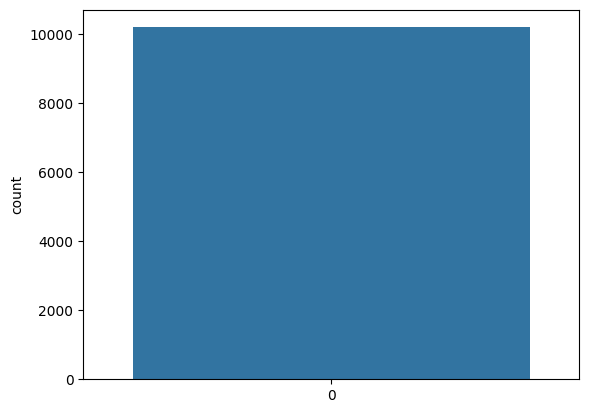

In [92]:
sns.countplot(y_train['Exited'])

**Build a model with the balanced dataset**

In [93]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [94]:
## Initilaize a sequential model
model_4 = Sequential()

# Add a input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Add dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [95]:
## Obtain the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [96]:
# Complete the code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 6ms/step - loss: 0.6169 - accuracy: 0.6738 - val_loss: 0.5560 - val_accuracy: 0.7362
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5613 - accuracy: 0.7175 - val_loss: 0.5334 - val_accuracy: 0.7331
Epoch 3/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.7275 - val_loss: 0.5090 - val_accuracy: 0.7481
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5359 - accuracy: 0.7376 - val_loss: 0.5318 - val_accuracy: 0.7325
Epoch 5/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7494 - val_loss: 0.5236 - val_accuracy: 0.7431
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5149 - accuracy: 0.7484 - val_loss: 0.5130 - val_accuracy: 0.7531
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5052 - accuracy: 0.7565 - val_loss: 0.5049 - val_accuracy: 0.7538

**Loss function**

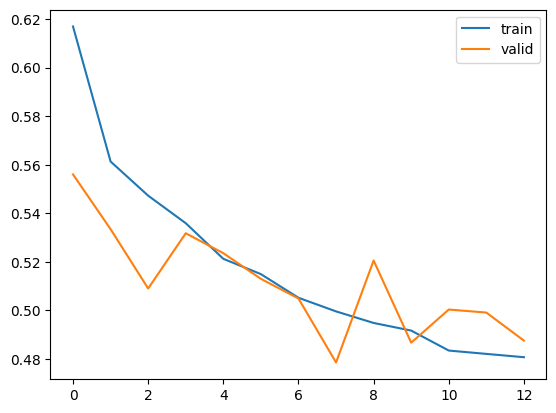

In [97]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Finding the optimal  threshold**

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.486954, G-Mean=0.795


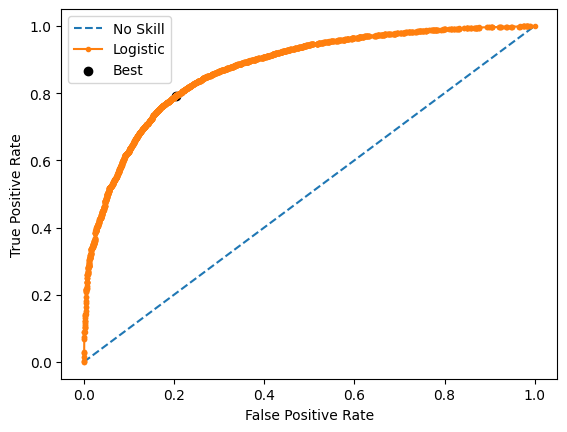

In [98]:
## Complete the code to find the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [94]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1274
           1       0.44      0.66      0.53       326

    accuracy                           0.76      1600
   macro avg       0.67      0.72      0.68      1600
weighted avg       0.81      0.76      0.77      1600



**Confusion matrix**

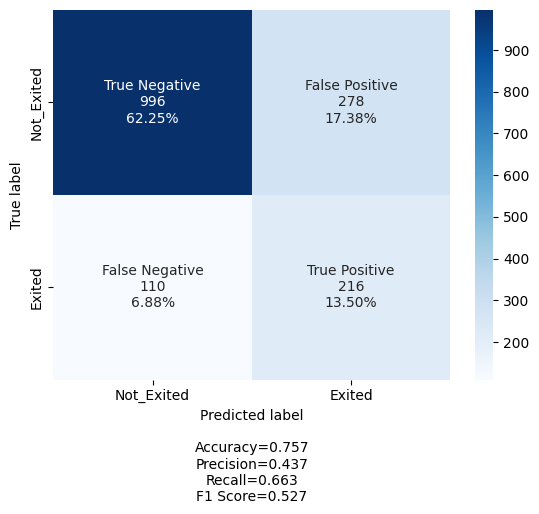

In [100]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

This approach has not helped at all
- Accuracy has gone down to 0.757
- Recall has significantly suffered and is now down to 0.663

Based on all the models analyzed and evaluate so far model_3 is the the best model with an Accuracy of 0.799 and Recall of 0.736

## Final Model

319/319 [==============================] - 0s 1ms/step
Best Threshold=0.197877, G-Mean=0.810


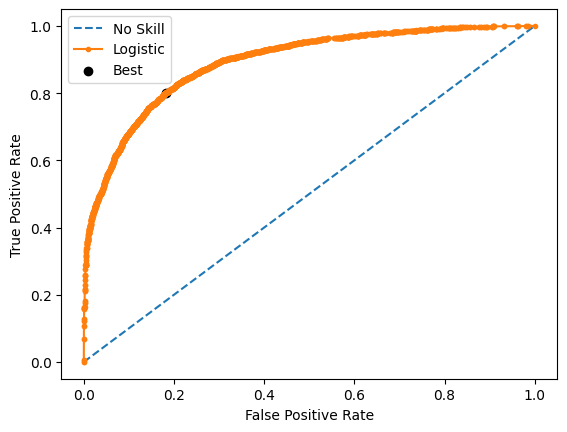

In [101]:
# predict probabilities using the best model
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [102]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = model_3.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


**Classification report**

In [103]:
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.75      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



**Confusion report**

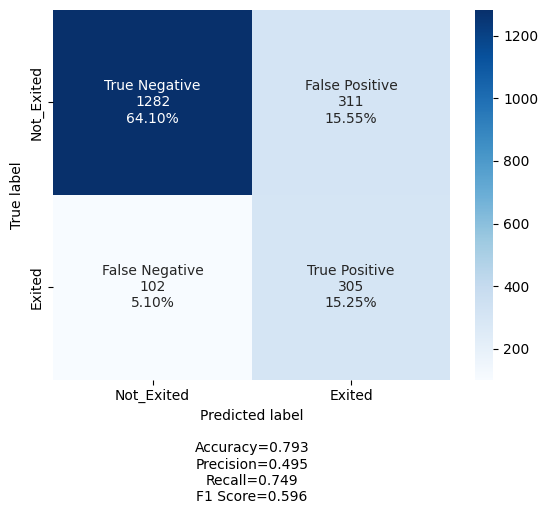

In [104]:
# Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Based on the above
- Model3 provided an accuracy of 0.793 and a Recall of 0.749 with test data which is inline with the model training results

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

Below are the recommendations to the bank based on on the insights from the data
- **Focus on Female Customers:** Femal customers have highre attrition rates compare to Males. Incentivize the Female customers with targetted marketing / product strategies
- **Encourage Inactive customers to be Active:** Most churn was due to InActive customers. 48% Inactive customers is a significantly high number. Implement promotions or programs to have customers be more activley banking and engaged as this will help with customer retention
- **Focus on Older Age groups that are churning:** Implement retention promotions and programs for older customers that tend to have a higher churn
- **Focus on new customers with less than a year tenure and customers who are long-timers with the bank:** - Based on the data significant churn was due to customers with a 0-1 year and 10 year tenure. Focus on thee customers and implment targetted programs for them to not churn
- **Geography Focus:** German customers had significantly higher chunr rates compared to Spain and France. This will need to be further doublelciked aand analysed to see if any targetted marketing campaigns or promotions are needed for German customers

___

In [108]:
!jupyter nbconvert --to html INN_Learner_Notebook_Full_code_version.ipynb

[NbConvertApp] Converting notebook INN_Learner_Notebook_Full_code_version.ipynb to html
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn(
[NbConvertApp] Writing 2305343 bytes to INN_Learner_Notebook_Full_code_version.html
